In [61]:
import heapq

In [62]:
def befs(graph,start,goal,heuristic):
    pq=[(heuristic[start],0, start, [start])]
    visited=[]

    while pq:
        _,cost,node,path=heapq.heappop(pq)
        if node  in visited:
            continue
        visited.append(node)

        if node == goal:
            return path,cost

        for neighbour,path_cost in graph[node]:
            if neighbour not in visited:
                new_cost=cost+path_cost
                heapq.heappush(pq,(heuristic[neighbour],new_cost,neighbour,path+[neighbour]))
    return None,None

In [63]:
graph = {
    'A': [('B',12), ('C',9), ('D',4)],
    'B': [('E',8), ('F',7)],
    'C': [('G',9), ('H',6)],
    'D': [('I',6)],
    'E': [('J',9),( 'K',4)],
    'F': [],
    'G': [('L',12)],
    'H': [],
    'I': [('M',10)],
    'J': [],
    'K': [('N',8)],
    'L': [],
    'M': [],
    'N': []
}

heuristic = {
    'A': 5, 'B': 4, 'C': 2, 'D': 6,
    'E': 7, 'F': 8, 'G': 3, 'H': 0,
    'I': 9, 'J': 10, 'K': 11, 'L': 4,
    'M': 12, 'N': 13
}


In [64]:
PATH,COST=befs(graph, 'A', 'H', heuristic)
print(f"Path found by Best-First Search :{PATH}")
print(f"Total cost : {COST}")

Path found by Best-First Search :['A', 'C', 'H']
Total cost : 15


In [65]:
import matplotlib.pyplot as plt
import networkx as nx


In [66]:
G=nx.DiGraph()


In [67]:
for node in graph:
    for neigh,weight in graph[node]:
        G.add_edge(node,neigh,weight=weight)

In [68]:
pos=nx.spring_layout(G,seed=42)

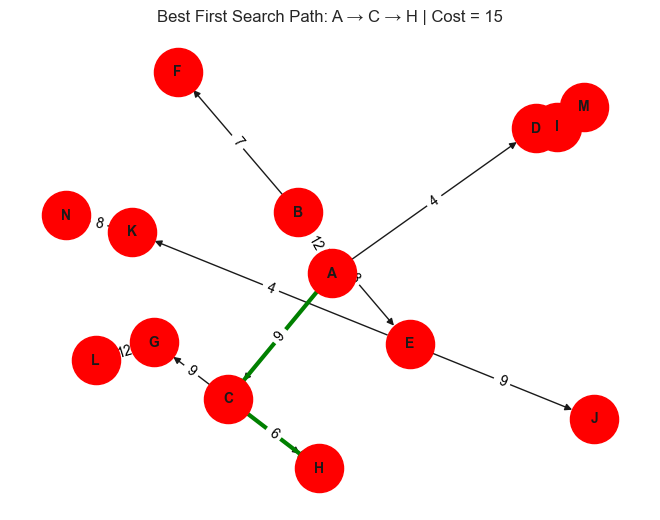

In [69]:
# Highlight path edges
path_edges = list(zip(PATH, PATH[1:]))

nx.draw(G,pos,with_labels=True,node_size=1200,node_color="red",
        font_size=10,font_weight="bold",arrows=True)

# Highlight only path edges in green
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color="green",width=3)

# Edge labels
edge_labels=nx.get_edge_attributes(G,"weight")
nx.draw_networkx_edge_labels(G,pos,edge_labels,font_color="black")

plt.title(f"Best First Search Path: {' → '.join(PATH)} | Cost = {COST}")
plt.show()
